**PCA - Ordenando os atletas de acordo com as modalidades, redução de variaveis**

**PCA (Principal Component Analysis)** é uma técnica de análise multivariada que pode ser usada para analisar inter-relações entre um grande número de variáveis e explicar essas variáveis em termos de suas dimensões inerentes (Componentes).

O objetivo é encontrar um meio de condensar a informação contida em várias variáveis originais em um conjunto menor de variáveis estatísticas (componentes) com uma perda mínima de informação.

vídeo : https://www.youtube.com/watch?v=u8th43VOyCw&t=1030s

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv("decathlon.csv")

In [ ]:
df.head(30)

,Unnamed: 0,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar
5,WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,6,8030,Decastar
6,ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar
7,McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar
8,MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar
9,HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,10,7733,Decastar


In [ ]:
# 1. Análise a matriz de correlações dos dados
#Cálculo da matriz de correlações
corr = df.iloc[:,0:9].corr()
corr

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault
100m,1.000000,-0.598678,-0.356482,-0.246253,0.520298,0.579889,-0.221708,-0.082537
Long.jump,-0.598678,1.000000,0.183304,0.294644,-0.602063,-0.505410,0.194310,0.204014
Shot.put,-0.356482,0.183304,1.000000,0.489212,-0.138433,-0.251616,0.615768,0.061182
High.jump,-0.246253,0.294644,0.489212,1.000000,-0.187957,-0.283289,0.369218,-0.156181
400m,0.520298,-0.602063,-0.138433,-0.187957,1.000000,0.547988,-0.117879,-0.079292
110m.hurdle,0.579889,-0.505410,-0.251616,-0.283289,0.547988,1.000000,-0.326201,-0.002704
Discus,-0.221708,0.194310,0.615768,0.369218,-0.117879,-0.326201,1.000000,-0.150072
Pole.vault,-0.082537,0.204014,0.061182,-0.156181,-0.079292,-0.002704,-0.150072,1.000000


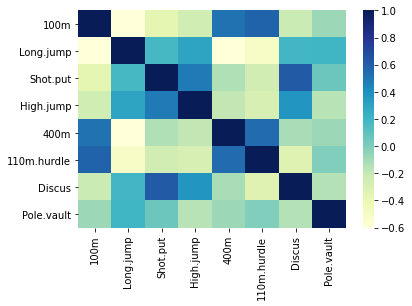

In [ ]:
#Mapa de calor de correlações

sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, cmap="YlGnBu")

Observando o mapa de correlação, podemos dizer que existem algumas associações moderadas para forte entre as modalidades.


In [ ]:
#Análise de componentes principais
#2.Decomponha a matriz de variâncias e covariâncias em componentes principais

X = np.matrix(df.iloc[:,1:10])
S = np.cov(np.transpose(X))

In [ ]:
#variâncias

np.diagonal(S)

array([6.91810976e-02, 1.00110000e-01, 6.79681220e-01, 7.91219512e-03,
       1.33044878e+00, 2.22584878e-01, 1.14098352e+01, 7.72839024e-02,
       2.32981930e+01])

In [ ]:
# Fazendo análise de componentes principais
from sklearn.decomposition import PCA
pca = PCA(n_components=5) #função com número de componentes igual a 5

In [ ]:
pca

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#Pesos das componentes principais
pca.components_[0:] #coeficiente da primeira principal

array([[-0.01020883,  0.00952266,  0.07801035,  0.0041035 , -0.00393585,
        -0.00423203,  0.21088427, -0.00282519,  0.97426336],
       [-0.01521551,  0.0164764 ,  0.12835538,  0.00875059, -0.04963746,
        -0.04917242,  0.96417523, -0.01120178, -0.21978214],
       [ 0.12111256, -0.16513049, -0.06066571, -0.01213369,  0.94747415,
         0.22473094,  0.07212051, -0.0285286 , -0.00309798],
       [-0.08893475, -0.00932794,  0.972998  ,  0.04109835,  0.09222712,
        -0.02485507, -0.13740483,  0.11500183, -0.04858278],
       [-0.26961242,  0.22908003, -0.07882879,  0.02152161,  0.28273949,
        -0.88715487, -0.02731898,  0.0200777 ,  0.00441717]])

In [ ]:
#3.Descobrir quantos componentes explicam 90% da variabilidade dos dados
#Variância das componentes principais

pca.explained_variance_ratio_
np.round(pca.explained_variance_ratio_,2)

array([0.64, 0.3 , 0.04, 0.01, 0.  ])

No código acima, podemos notar que a primeira componente principal explica 64% da variabilidade dos dados, a segunda componente principal explica 30% da variabilidade dos dados e assim sucessivamente.
Realizando uma soma (0.64 + 0.3 ), obtemos 0,94, concluindo que a partir do segundo componente já conseguimos uma variabilidade acima do total indicado que é 90%.

In [ ]:
pca.explained_variance_ratio_.cumsum() # soma acumulativa dos elementos

array([0.64467978, 0.94339472, 0.98194959, 0.99170416, 0.99558607])

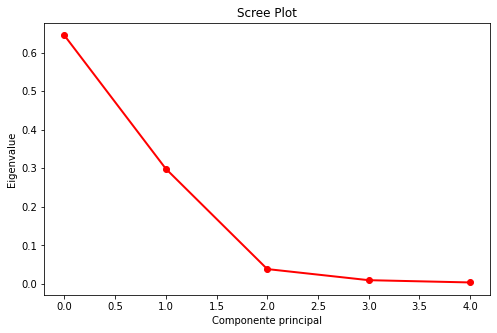

In [ ]:
# Outra forma de verificar a variabilidade nos componentes principais
fig = plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_,'ro-',linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Componente principal')
plt.ylabel('Eigenvalue')

plt.show()


O gráfico vai adicionando as componentes até que os dados acabem ficando na horizontal. Nesse caso, duas componentes principais é o ideal.

In [ ]:
pca.transform(X) #Score das 5 componentes principais aplicados no conj. de dados

array([[ 4.65528953e+00, -1.59196422e+00,  6.81358836e-02,
         2.28226995e-01,  5.87065189e-02],
       [ 3.12393184e+00,  5.77720022e+00,  5.53096242e-02,
        -1.15462461e+00,  3.70900910e-01],
       [-6.79540083e+00,  6.34236959e+00, -9.65465733e-01,
        -4.51483469e-02, -7.17711488e-02],
       [ 3.59110832e+00, -4.33213281e+00, -8.20807004e-01,
         2.47817056e-02, -4.05697222e-01],
       [ 5.44447578e+00,  7.49597220e-01,  1.06927891e+00,
         2.06945535e-01, -6.13213735e-01],
       [-7.06442341e+00, -1.62555460e+00, -1.22096024e+00,
         5.26811882e-01,  1.92008344e-01],
       [-2.65911800e+00,  1.88952028e+00, -8.56640316e-01,
        -1.14290514e+00,  1.01245752e-01],
       [-1.93104161e+00,  4.22237820e-01,  2.62397507e-01,
        -6.00646032e-01,  3.82201320e-01],
       [-5.14957095e+00,  4.42364431e+00,  9.65945802e-01,
        -6.42926158e-02, -5.36309133e-01],
       [-9.72057632e-01,  7.81222631e-01,  1.55854844e+00,
        -1.03337614e-02

In [ ]:
#Considerando 2 componentes principais
pca = PCA(n_components=2)
pca.fit(X)
pca.components_

array([[-0.01020883,  0.00952266,  0.07801035,  0.0041035 , -0.00393585,
        -0.00423203,  0.21088427, -0.00282519,  0.97426336],
       [-0.01521551,  0.0164764 ,  0.12835538,  0.00875059, -0.04963746,
        -0.04917242,  0.96417523, -0.01120178, -0.21978214]])

In [ ]:
np.round(pca.components_[0],3) #arredondou os componentes principais PCA1
#O o.9474 influência na ordenação dos atletas ( tem um peso maior se comparado as outras modalidades)

array([-0.01 ,  0.01 ,  0.078,  0.004, -0.004, -0.004,  0.211, -0.003,
        0.974])

In [ ]:
np.round(pca.components_[1],3)#arredondou os componentes principais PCA2
#O o.964 influência na ordenação dos atletas ( tem um peso maior se comparado as outras modalidades)

array([-0.015,  0.016,  0.128,  0.009, -0.05 , -0.049,  0.964, -0.011,
       -0.22 ])

In [ ]:
PCA1 = pca.transform(X)[:,0]
PCA2 = pca.transform(X)[:,1]

In [ ]:
df['PCA1'] = PCA1 #acrescentando pca1 no conjunto de dados
df['PCA2'] = PCA2 #acrescentando pca2 no conjunto de dados

In [ ]:
df.head()
#Scores das componentes principais aplicados ao conj. de dados

,Unnamed: 0,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar,4.655290,-1.591964
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar,3.123932,5.777200
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar,-6.795401,6.342370
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar,3.591108,-4.332133
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar,5.444476,0.749597


In [ ]:
#4.Ordenação dos atletas segudo a primeira componente principal
df.sort_values(by='PCA1',ascending=True)

,Unnamed: 0,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
31,Drews,10.87,7.38,13.07,1.88,48.51,14.01,40.11,5.00,51.53,274.21,19,7926,OlympicG,-7.602436,-2.668989
33,Terek,10.92,6.94,15.15,1.94,49.56,15.12,45.62,5.30,50.62,290.36,21,7893,OlympicG,-7.178914,2.993051
5,WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,6,8030,Decastar,-7.064423,-1.625555
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar,-6.795401,6.342370
37,Karlivans,11.33,7.26,13.30,1.97,50.54,14.98,43.34,4.50,52.92,278.67,25,7583,OlympicG,-5.565263,0.018272
8,MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar,-5.149571,4.423644
38,Korkizoglou,10.86,7.07,14.81,1.94,51.16,14.96,46.07,4.70,53.05,317.00,26,7573,OlympicG,-4.745154,2.787442
27,Averyanov,10.55,7.34,14.44,1.94,49.72,14.39,39.88,4.80,54.51,271.02,15,8021,OlympicG,-4.643434,-3.441625
23,Pogorelov,10.95,7.31,15.10,2.06,50.79,14.21,44.60,5.00,53.45,287.63,11,8084,OlympicG,-4.637184,1.374934
12,BOURGUIGNON,11.36,6.80,13.46,1.86,51.16,15.67,40.49,5.02,54.68,291.70,13,7313,Decastar,-4.451066,-3.175434


In [ ]:
df.sort_values(by='PCA2',ascending=True)

,Unnamed: 0,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
11,NOOL,11.33,7.27,12.68,1.98,49.20,15.29,37.92,4.62,57.44,266.60,12,7651,Decastar,-2.349192,-6.230374
35,Turi,11.08,6.91,13.62,2.03,51.67,14.26,39.83,4.80,59.34,290.01,23,7708,OlympicG,-0.028515,-4.761395
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar,3.591108,-4.332133
36,Lorenzo,11.10,7.03,13.22,1.85,49.34,15.38,40.22,4.50,58.36,263.08,24,7592,OlympicG,-0.926775,-4.157282
28,Ojaniemi,10.68,7.50,14.97,1.94,49.12,15.01,40.35,4.60,59.26,275.71,16,8006,OlympicG,0.125277,-3.962205
32,Parkhomenko,11.14,6.61,15.69,2.03,51.04,14.88,41.90,4.80,65.82,277.94,20,7918,OlympicG,6.879109,-3.929116
34,Gomez,11.08,7.26,14.57,1.85,48.61,14.41,40.95,4.40,60.71,269.70,22,7865,OlympicG,1.631659,-3.707495
27,Averyanov,10.55,7.34,14.44,1.94,49.72,14.39,39.88,4.80,54.51,271.02,15,8021,OlympicG,-4.643434,-3.441625
12,BOURGUIGNON,11.36,6.80,13.46,1.86,51.16,15.67,40.49,5.02,54.68,291.70,13,7313,Decastar,-4.451066,-3.175434
20,Nool,10.80,7.53,14.26,1.88,48.81,14.80,42.05,5.40,61.33,276.33,8,8235,OlympicG,2.443782,-2.854293


Resultado: Ordenação dos atletas com todas as observações independentes, considerando seus pesos um fator de influência na ordenação. Ou seja, o peso mostrado no array das componentes principais( seja PCA1 ou PCA2) influência diretamente na ordenação dos atletas em determinada modalidade.